# Лаба по инфе по исследованию ассимптотической сложности алгоритмов
## Поиск(3 - 5)
### Начнем с поиска полным перебором(```brut_search```)
Ниже код, который 999 раз запускает программу ```brut_search``` в соответствующей директории, принимающей в качестве аргументов 2 числа: количество раз, которое небходимо повторить(это нужно, чтобы повысить точноть) и длину массивов, с которыми необходимо работать.

Код запускает программу на выполнение параллельно ```workers``` раз (нужно, чтобы было быстрее, правда в итоге увеличивается разброс значений, но зато красиво) 

In [129]:
from tqdm.notebook import tqdm

import subprocess
import numpy as np

workers = 6
def test(argss, workers = 1):
    outputs = []
    busy_count = 0
    
    active_procs = []
    for args in argss:
        active_procs.append(subprocess.Popen(args, stdout=subprocess.PIPE))
        busy_count += 1
        if busy_count >= workers:
            break
    
    with tqdm(total=len(x)) as pbar:
        running = True
        while running:
            running = False
            for proc_i in range(len(active_procs)):
                proc = active_procs[proc_i]
                if proc.poll() is None:
                    running = True
                else:
                    outputs.append(proc.stdout.read())
                    pbar.update(1)
                    if busy_count < len(argss):
                        active_procs[proc_i] = subprocess.Popen(argss[busy_count], stdout=subprocess.PIPE)
                        busy_count += 1
                        running = True
                    # print(busy_count)
    return outputs
    
#processes.append(subprocess.Popen(['./brut_search/brut_search', 1000000, 100]))


In [ ]:
prog = './brut_search/brut_search'
x = np.linspace(1000, 1000000, num=999)
argss = [[prog, str(int(10000000/i)), str(int(i))] for i in x]
outputs = test(argss, workers=workers) 

при ```workers``` = 1 время выполнения 4:36

при ```workers``` = 2 время выполнения 2:31

при ```workers``` = 3 время выполнения 1:58

при ```workers``` = 4 время выполнения 1:40

при ```workers``` = 5 время выполнения 1:34

при ```workers``` = 6 время выполнения 1:29

Я дурачек, и мне лень делать так, чтобы когда невыполненых процессов мало (```len(active_procs) < workers```) выходы с выполненых программ, оставшихся в списке не записывались (они пустые), поэтому отсортируем

In [104]:
outputs = list(filter(lambda x: x != b'', outputs))
len(outputs)

999

Я задрался каждый раз ждать, поэтому сохраним в файлики

In [105]:
import numpy as np

data = np.array(list(zip([int(args[1]) for args in argss], [int(time[:-1]) for time in outputs])),
             dtype=[('iterations', int), ('time, ms', int)])

np.save(f'brut{len(x)}iters{workers}workers.npy', data)

In [106]:
times = []
mean_time = []
for time, args in zip(outputs, argss):
    if time==b'':
        times.append(0)
    else:
        times.append(int(time[:-1]))
    mean_time.append(times[-1] / int(args[1]))

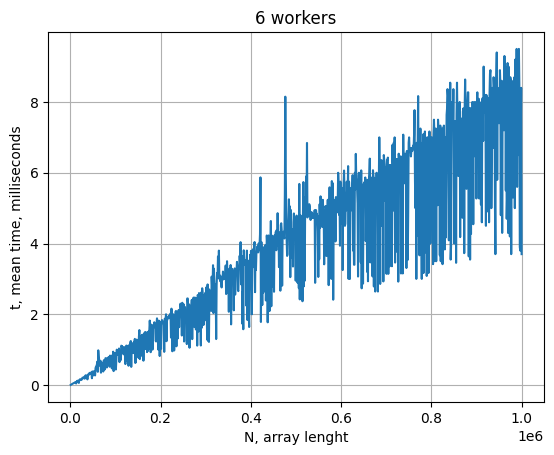

In [107]:
from matplotlib import pyplot as plt

plt.plot(x, mean_time)
plt.title(f'{workers} workers')
plt.xlabel('N, array lenght')
plt.ylabel('t, mean time, milliseconds')
plt.grid()
plt.savefig(f'brut{len(x)}points{workers}workers.jpg', dpi = 1000)
# plt.plot(x[:-4], times)

### Пришло время для бинарного поиска(```bin_search```)

In [162]:
from math import log

workers = 1

prog = './bin_search/bin_search'
x = np.linspace(10000, 1000000, num=99)
argss = [[prog, str(int(1000 / log(i/10000 * 2.75))), str(int(i))] for i in x]
outputs = test(argss, workers=workers) 
outputs = list(filter(lambda x: x != b'', outputs))
len(outputs)

  0%|          | 0/99 [00:00<?, ?it/s]

[b'3696262\n', b'4332747\n', b'5045720\n', b'6878500\n', b'7369108\n', b'8751618\n', b'8953192\n', b'9911305\n', b'9956994\n', b'10395079\n', b'11144763\n', b'11526065\n', b'12270810\n', b'12566526\n', b'13044576\n', b'13949846\n', b'14553995\n', b'14621231\n', b'15127992\n', b'15525409\n', b'19526316\n', b'17456371\n', b'16984165\n', b'16986847\n', b'17495491\n', b'19559196\n', b'19643575\n', b'19812319\n', b'20692992\n', b'20675795\n', b'22347991\n', b'21695712\n', b'22295039\n', b'22427423\n', b'22868562\n', b'23518074\n', b'23842282\n', b'24346064\n', b'26953456\n', b'27030710\n', b'29212653\n', b'28173275\n', b'28056878\n', b'28717764\n', b'28652404\n', b'30827542\n', b'29520553\n', b'30494325\n', b'30588003\n', b'31006592\n', b'31460882\n', b'38220283\n', b'38641010\n', b'33093142\n', b'32674695\n', b'34829179\n', b'34162764\n', b'33586602\n', b'35882342\n', b'36959090\n', b'36596132\n', b'37167000\n', b'37437096\n', b'38615418\n', b'37530457\n', b'38677405\n', b'40516118\n', b'4

99

На измерении микросекунд он обещал счилтать несколько часов, поэтому я поменял на наносекунды (4*60/1000 должно быть меньше минунты, так что тут все-равно что-то не так, ну да ладно)

при ```workers``` = 1 работает за 6:35

при ```workers``` = 2 работает за 3:04

поменял константу с 100 на 1000

при ```workers``` = 1 работает за 46:56


In [163]:
import numpy as np

data = np.array(list(zip([int(args[1]) for args in argss], [int(time[:-1]) for time in outputs])),
             dtype=[('iterations', int), ('time, ms', int)])

np.save(f'bin{len(x)}iters{workers}workers1000const.npy', data)

In [164]:
times = []
mean_time = []
for time, args in zip(outputs, argss):
    times.append(int(time[:-1]))
    mean_time.append(times[-1] / int(args[1]))

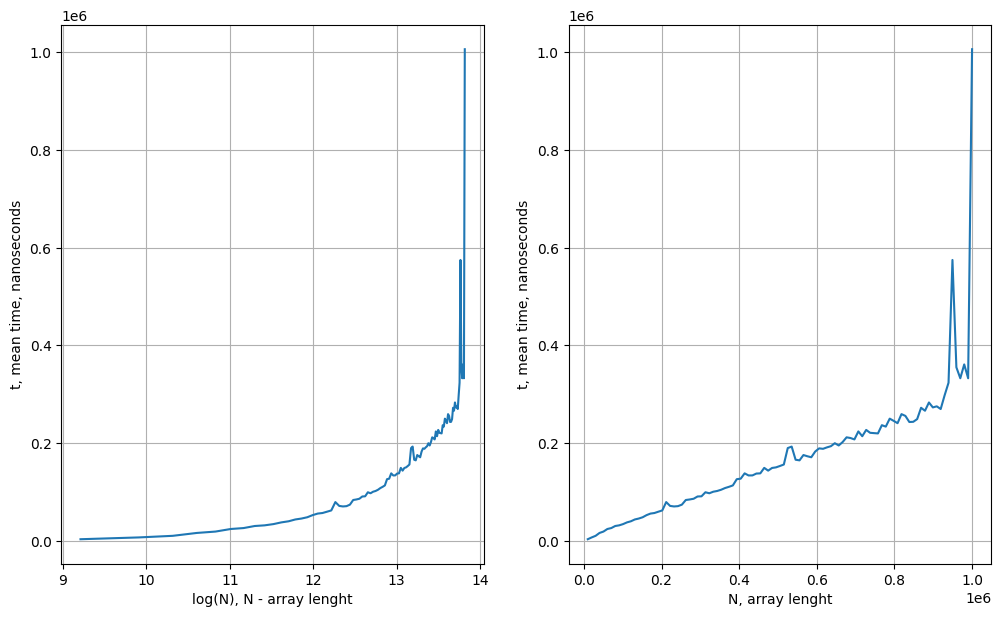

In [180]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 7))

axs[0].plot(np.log(x), mean_time)
#axs[0].title = f'{workers} workers'
axs[0].set_xlabel('log(N), N - array lenght')
axs[0].set_ylabel('t, mean time, nanoseconds')
axs[0].grid()
# axs[0].savefig(f'bin{len(x)}points{workers}workers_log.jpg', dpi = 1000)

axs[1].plot(x, mean_time)
# axs[1].title = f'{workers} workers'
axs[1].set_xlabel('N, array lenght')
axs[1].set_ylabel('t, mean time, nanoseconds')
axs[1].grid()
# fig.savefig(f'bin{len(x)}points{workers}workers.jpg', dpi = 1000)

plt.show()
# plt.plot(x[:-4], times)

## Сумма двух (6 - 7)
### Алгоритм для неотсортированного массива

In [189]:
from math import log

workers = 1

prog = './sum_of_two/sumof2unsorted'
x = np.linspace(10000, 1000000, num=99)
argss = [[prog, str(1), str(int(i))] for i in x]
outputs = test(argss, workers=workers) 

outputs = list(filter(lambda x: x != b'', outputs))
len(outputs)

  0%|          | 0/99 [00:00<?, ?it/s]

99

In [190]:
import numpy as np

data = np.array(list(zip([int(args[1]) for args in argss], [int(time[:-1]) for time in outputs])),
             dtype=[('iterations', int), ('time, ms', int)])

np.save(f'sumof2{len(x)}iters{workers}workers.npy', data)

In [191]:
times = []
mean_time = []
for time, args in zip(outputs, argss):
    times.append(int(time[:-1]))
    mean_time.append(times[-1] / int(args[1]))

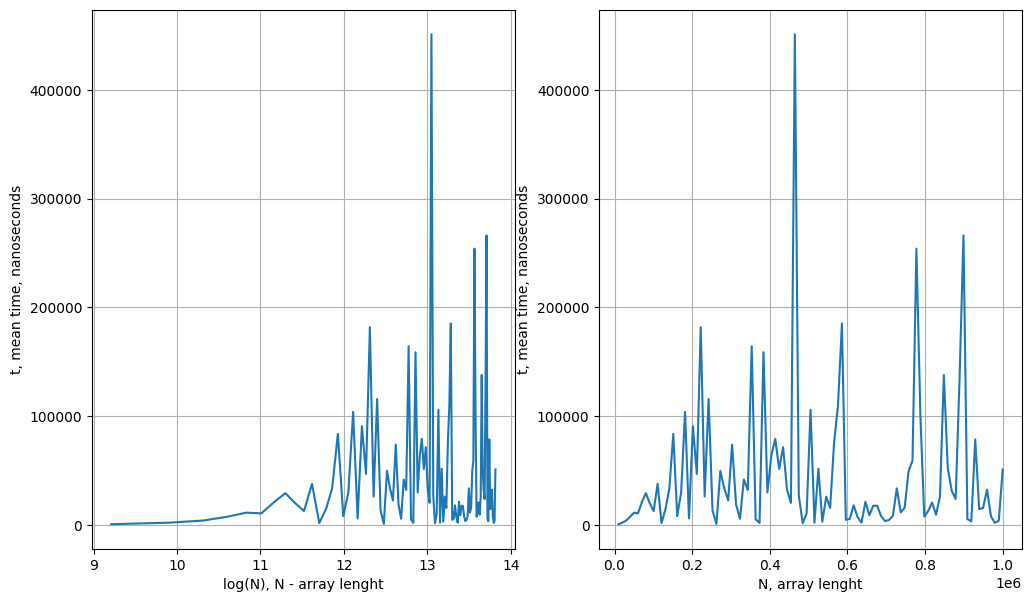

In [192]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 7))

axs[0].plot(np.log(x), mean_time)
#axs[0].title = f'{workers} workers'
axs[0].set_xlabel('log(N), N - array lenght')
axs[0].set_ylabel('t, mean time, nanoseconds')
axs[0].grid()
# axs[0].savefig(f'bin{len(x)}points{workers}workers_log.jpg', dpi = 1000)

axs[1].plot(x, mean_time)
# axs[1].title = f'{workers} workers'
axs[1].set_xlabel('N, array lenght')
axs[1].set_ylabel('t, mean time, nanoseconds')
axs[1].grid()
# fig.savefig(f'bin{len(x)}points{workers}workers.jpg', dpi = 1000)

plt.show()
# plt.plot(x[:-4], times)

```c++
int **arr = new int*[iterations];
for(size_t i = 0; i < iterations; ++i)
    arr[i] = new int[arrlen];
```